# Assignment 3b code

## 1. Read datasets

In [47]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('../data/Groceries data train.csv')
df_test = pd.read_csv('../data/Groceries data test.csv')

In [48]:
df_train.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


In [49]:
df_test.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3481,8/03/2015,candy,2015,3,8,6
1,1254,19/04/2015,white wine,2015,4,19,6
2,2835,28/01/2014,domestic eggs,2014,1,28,1
3,2854,2/08/2015,coffee,2015,8,2,6
4,4637,12/08/2014,bottled water,2014,8,12,1


In [50]:
print(df_train.shape)
print(df_test.shape)

(27000, 7)
(11765, 7)


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    27000 non-null  int64 
 1   Date             27000 non-null  object
 2   itemDescription  27000 non-null  object
 3   year             27000 non-null  int64 
 4   month            27000 non-null  int64 
 5   day              27000 non-null  int64 
 6   day_of_week      27000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11765 entries, 0 to 11764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    11765 non-null  int64 
 1   Date             11765 non-null  object
 2   itemDescription  11765 non-null  object
 3   year             11765 non-null  int64 
 4   month            11765 non-null  int64 
 5   day              11765 non-null  int64 
 6   day_of_week      11765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 643.5+ KB


In [53]:
# number of unique members in each dataset
print(df_train['Member_number'].nunique())  # 3872
print(df_test['Member_number'].nunique())  # 3566

3872
3566


In [54]:
# check intersection of members between train and test
train_members = set(df_train['Member_number'].unique())
test_members = set(df_test['Member_number'].unique())
intersection = train_members.intersection(test_members)
print("number of common members: ", len(intersection))  # 3540
print("Repetition rate: ", len(intersection) / len(train_members))  # 0.9142561983471075

number of common members:  3540
Repetition rate:  0.9142561983471075


In [55]:
# print first 5 members in the intersection
print(list(intersection)[:5])

[1000, 1001, 1002, 1003, 1004]


In [56]:
# group data by member number and create a list of items purchased by each member
train_data = df_train.groupby('Member_number')['itemDescription'].apply(set).apply(list).reset_index()
test_data = df_test.groupby('Member_number')['itemDescription'].apply(set).apply(list).reset_index()

In [57]:
# show first 5 members in the train data
train_data.head()

,Member_number,itemDescription
0,1000,"[soda, canned beer, pickled vegetables, sausag..."
1,1001,"[soda, whipped/sour cream, sausage, curd, beef..."
2,1002,"[frozen vegetables, sugar, butter milk, tropic..."
3,1003,"[dental care, root vegetables, sausage, rolls/..."
4,1004,"[pip fruit, shopping bags, other vegetables, c..."


In [58]:
# show first 5 members in the test data
test_data.head()

,Member_number,itemDescription
0,1000,"[semi-finished bread, whole milk, salty snack,..."
1,1001,[frankfurter]
2,1002,"[other vegetables, specialty chocolate]"
3,1003,"[frozen meals, rolls/buns]"
4,1004,"[root vegetables, chocolate, other vegetables,..."


## 2. Exploratory analysis

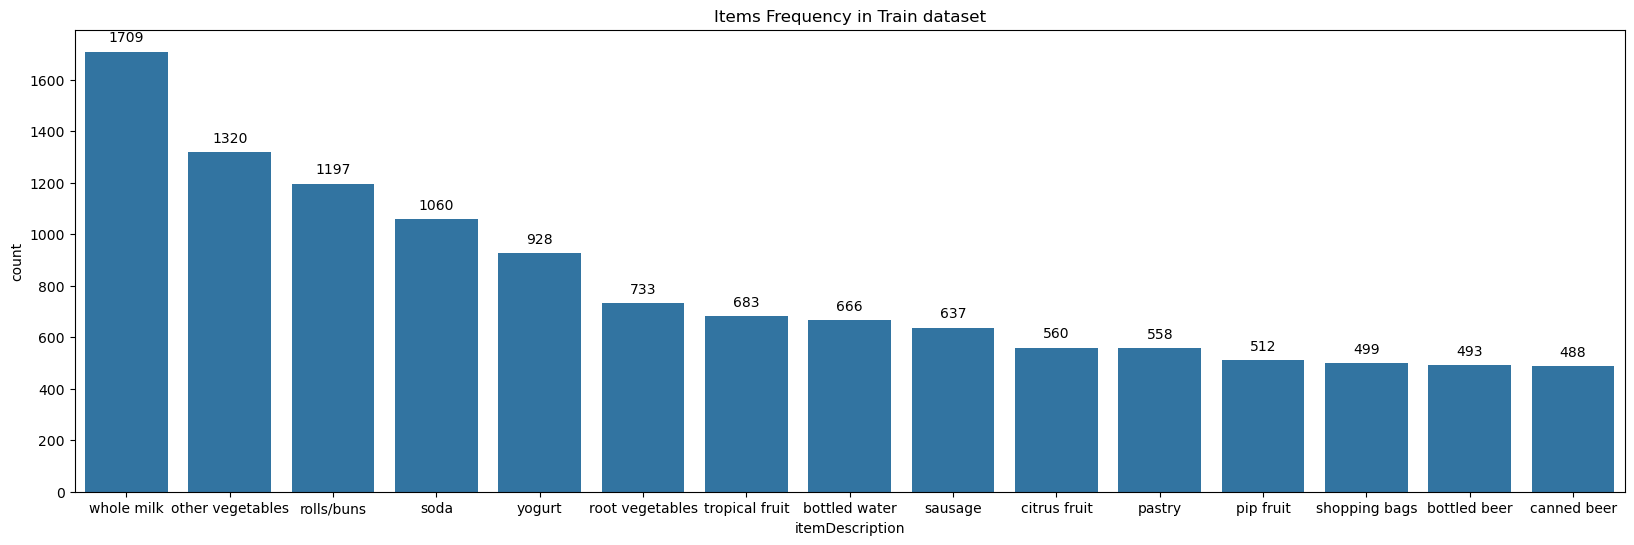

In [59]:
# count the number of items purchased by all members in the df_train
# show the result in a graph in descending order
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
plt.title("Items Frequency in Train dataset")
ax = sns.countplot(x='itemDescription', data=df_train, order=df_train['itemDescription'].value_counts().index[:15])

# Annotate count number on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

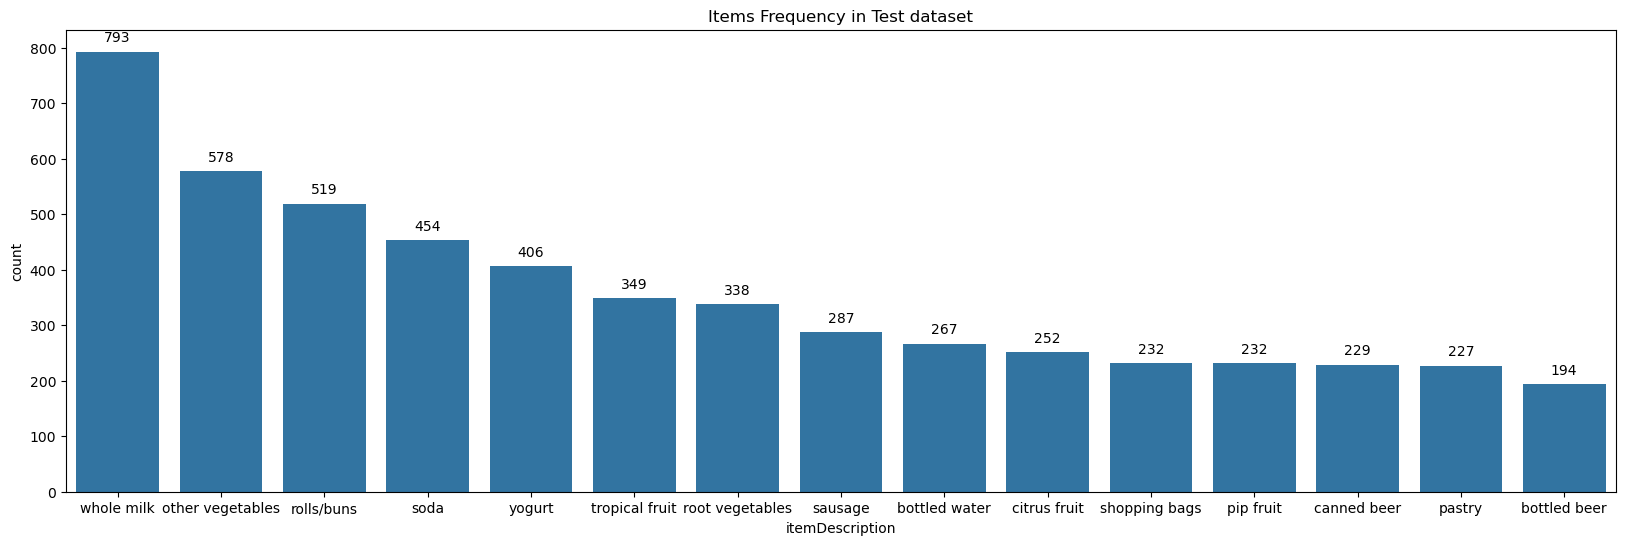

In [60]:
# count the number of items purchased by all members in the df_test
# show the result in a graph in descending order

plt.figure(figsize=(20, 6))
plt.title("Items Frequency in Test dataset")
ax = sns.countplot(x='itemDescription', data=df_test, order=df_test['itemDescription'].value_counts().index[:15])

# Annotate count number on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

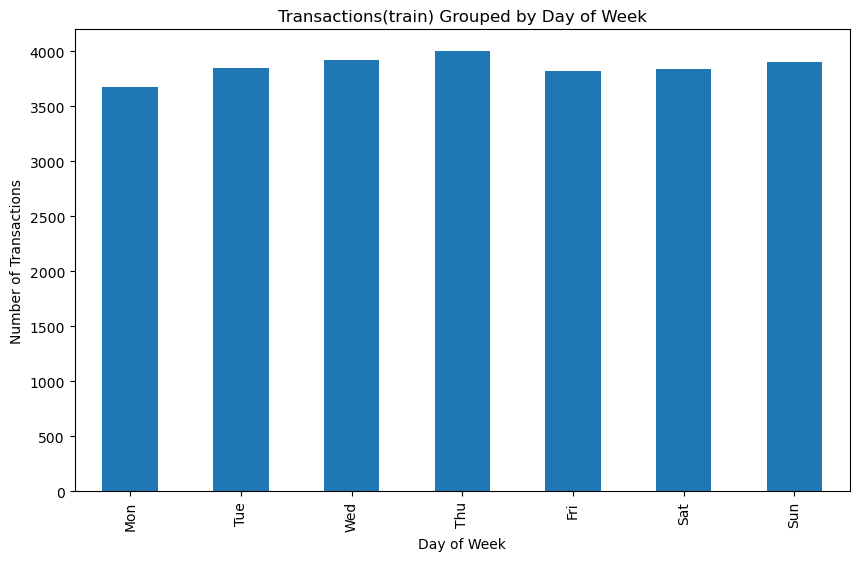

In [61]:
# Group the transactions by day of the week and count the number of transactions
transactions_by_day = df_train.groupby('day_of_week').size()

# Plot the number of transactions by day of the week
plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions(train) Grouped by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

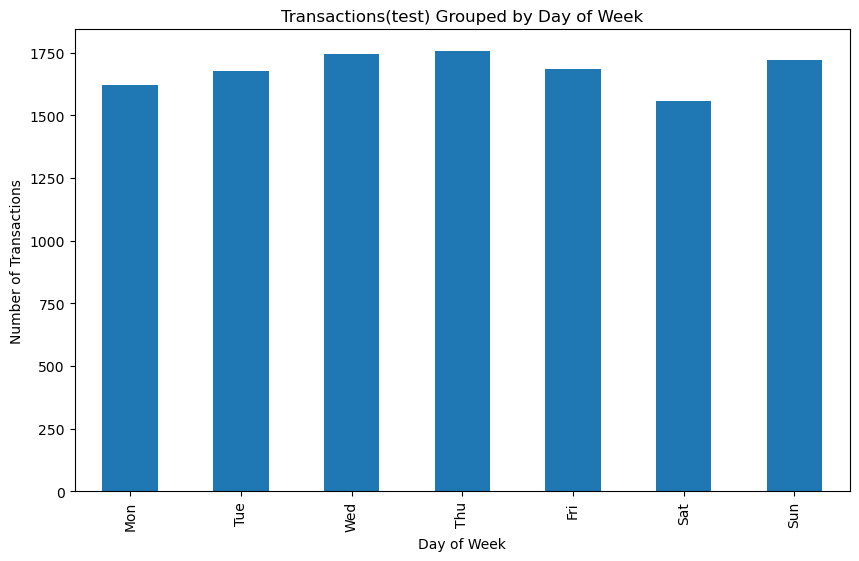

In [62]:
# Group the transactions by day of the week and count the number of transactions
transactions_by_day = df_test.groupby('day_of_week').size()

# Plot the number of transactions by day of the week
plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions(test) Grouped by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Text(0.5, 1.0, 'Number of Items Purchased by Members in Train Data')

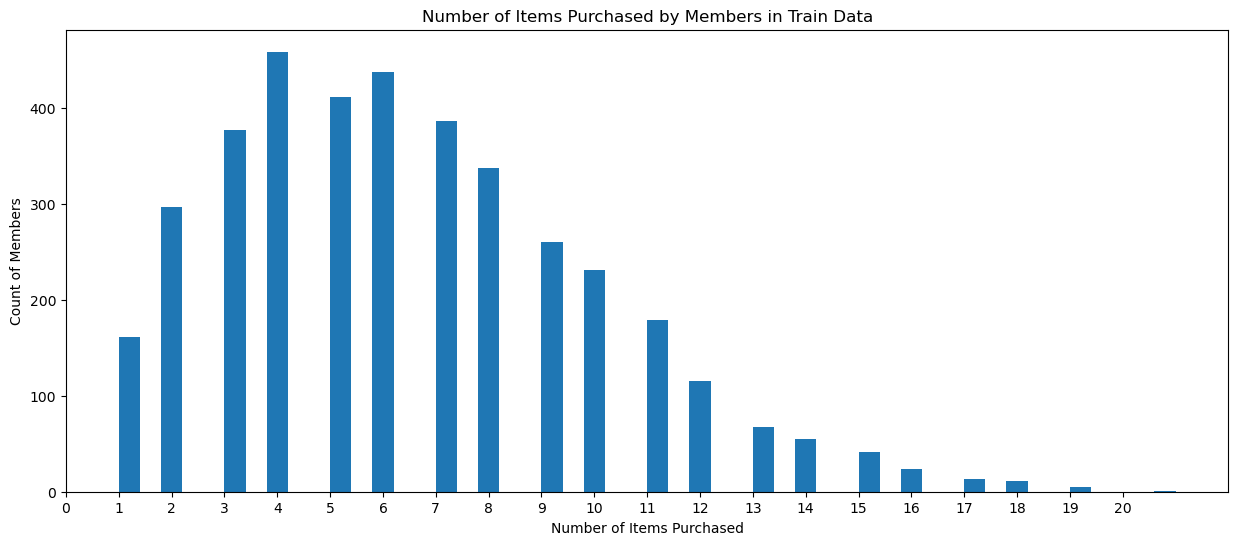

In [63]:
# show number of items purchased by all members in the train data
# x-axis: number of items purchased, y-axis: number of members
plt.figure(figsize=(15, 6))
plt.hist(train_data['itemDescription'].apply(len), bins=50)
plt.xticks(range(0, max(train_data['itemDescription'].apply(len)), 1))
plt.xlabel('Number of Items Purchased')
plt.ylabel('Count of Members')
plt.title('Number of Items Purchased by Members in Train Data')

Text(0.5, 1.0, 'Number of Items Purchased by Members in Test Data')

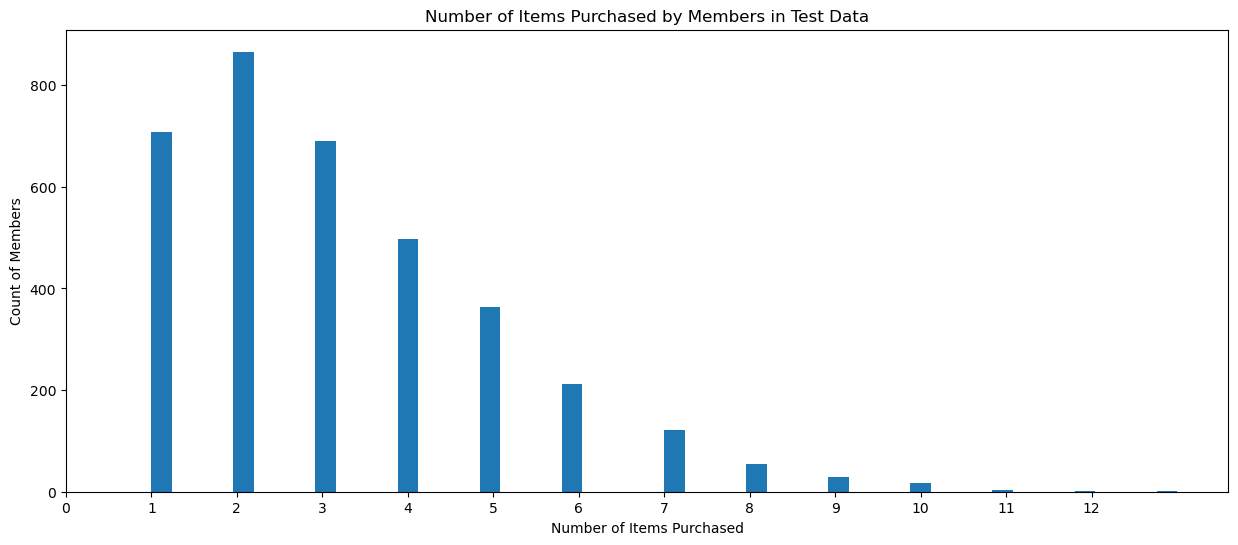

In [64]:
# show number of items purchased by all members in the test data
# x-axis: number of items purchased, y-axis: number of members
plt.figure(figsize=(15, 6))
plt.hist(test_data['itemDescription'].apply(len), bins=50)
plt.xticks(range(0, max(test_data['itemDescription'].apply(len)), 1))
plt.xlabel('Number of Items Purchased')
plt.ylabel('Count of Members')
plt.title('Number of Items Purchased by Members in Test Data')

## 3. Frequent pattern mining

In [65]:
# pick itemsets that has more than 1 item, sort them

train_data = train_data['itemDescription'].tolist()
train_data = [sorted(list(items)) for items in train_data]
train_data = [items for items in train_data if len(items) > 1]

In [66]:
print(type(train_data))
for i in range(5):
    print(train_data[i])

<class 'list'>
['canned beer', 'misc. beverages', 'pastry', 'pickled vegetables', 'sausage', 'soda', 'yogurt']
['beef', 'curd', 'frankfurter', 'rolls/buns', 'sausage', 'soda', 'whipped/sour cream', 'white bread', 'whole milk']
['butter', 'butter milk', 'frozen vegetables', 'sugar', 'tropical fruit', 'whole milk']
['dental care', 'detergent', 'rolls/buns', 'root vegetables', 'sausage']
['canned beer', 'chocolate', 'cling film/bags', 'dish cleaner', 'frozen fish', 'hygiene articles', 'other vegetables', 'pastry', 'pip fruit', 'red/blush wine', 'rolls/buns', 'shopping bags', 'whole milk']


In [67]:
len(train_data)

3711

In [68]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

te = TransactionEncoder()
te_ary = te.fit(train_data).transform(train_data)
train_df = pd.DataFrame(te_ary, columns=te.columns_)
train_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3709,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [85]:
# mine frequent itemsets
freq_items = fpgrowth(train_df, min_support=0.002, use_colnames=True)

rules = association_rules(freq_items, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(soda, rolls/buns)",(whole milk),0.072487,0.359472,0.032606,0.449814,1.251320,0.006549,1.164203,0.216540
1,"(soda, other vegetables, rolls/buns)",(whole milk),0.025330,0.359472,0.011318,0.446809,1.242958,0.002212,1.157878,0.200548
2,"(soda, other vegetables)",(whole milk),0.075182,0.359472,0.032875,0.437276,1.216440,0.005849,1.138263,0.192394
3,(yogurt),(whole milk),0.212881,0.359472,0.091081,0.427848,1.190213,0.014556,1.119507,0.203037
4,"(soda, yogurt)",(whole milk),0.058744,0.359472,0.026947,0.458716,1.276082,0.005830,1.183349,0.229854
...,...,...,...,...,...,...,...,...,...,...
5438,"(liquor (appetizer), whole milk)",(rolls/buns),0.005389,0.272703,0.002425,0.450000,1.650148,0.000956,1.322359,0.396129
5439,"(liquor (appetizer), rolls/buns)",(whole milk),0.003773,0.359472,0.002425,0.642857,1.788338,0.001069,1.793479,0.442491
5440,"(liquor (appetizer), soda)",(whole milk),0.004042,0.359472,0.002156,0.533333,1.483658,0.000703,1.372560,0.327313
5441,(potato products),(rolls/buns),0.004581,0.272703,0.002156,0.470588,1.725645,0.000907,1.373784,0.422442


1. ap cf
cf > top5 
ap, pattern > 

In [70]:
# get range of zhang's metric
print(rules['zhangs_metric'].min())
print(rules['zhangs_metric'].max())
rules.describe()

0.10200759631036356
0.9061738424045491


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000
mean,0.007862,0.304376,0.003859,0.523778,1.805398,0.001389,inf,0.408271
std,0.010167,0.061532,0.004304,0.102738,0.594871,0.000843,NaN,0.139085
min,0.002156,0.043654,0.002156,0.400000,1.112744,0.000273,1.067547,0.102008
25%,0.004312,0.272703,0.002425,0.444444,1.457164,0.000951,1.273242,0.318635
50%,0.005659,0.292643,0.002695,0.500000,1.669115,0.001229,1.408529,0.403811
75%,0.008084,0.359472,0.003773,0.571429,1.977881,0.001587,1.650499,0.497052
max,0.292643,0.359472,0.117219,1.000000,10.181070,0.014556,inf,0.906174


In [71]:
def predict_items(purchased_items):
    # create a list to store the predicted items
    predicted_items = []
    
    # iterate over the top rules
    for index, row in rules.iterrows():
        # get the items in the antecedent and consequent of the rule
        antecedent = row["antecedents"]
        consequent = row["consequents"]
        
        # check if all the items in the antecedent are in the purchased items
        if antecedent.issubset(purchased_items):
            # add the items in the consequent to the predicted items
            for item in consequent:
                if item not in purchased_items and item not in predicted_items:
                    predicted_items.append(item)
    
    # return the list of predicted items
    return predicted_items

### Example of using prediction function

In [72]:
# make a prediction for a sample set of purchased items
purchased_items = {'canned beer',
 'misc. beverages',
 'pastry',
 'pickled vegetables',
 'sausage',
 'soda',
 'yogurt'}
predicted_items = predict_items(purchased_items)

# print the predicted items to the console
print(predicted_items)

['whole milk', 'rolls/buns', 'other vegetables', 'pip fruit']


## 4. Collaborative filtering

In [76]:
# number of unique items in the dataset
df_train['itemDescription'].unique().size

167

In [ ]:
# count the frequency of each item in the dataset, group by Member_number, itemDescription
purchase_counts = df_train.groupby(['Member_number', 'itemDescription']).size().reset_index(name='Purchase_Count')

# define an empty dataframe to store the results
members = df_train['Member_number'].unique()
items = df_train['itemDescription'].unique()

new_df = pd.DataFrame(index=members, columns=items).fillna(0)

# fill the new DataFrame with purchase counts
for _, row in purchase_counts.iterrows():
    member = row['Member_number']
    item = row['itemDescription']
    count = row['Purchase_Count']
    new_df.at[member, item] = count

new_df = new_df.reset_index().rename(columns={'index': 'Member_number'})
new_df.set_index('Member_number', inplace=True)
new_df = new_df.sort_index()
new_df.head()

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### UV decomposition

In [ ]:
import numpy as np

# UV decomposition function
def uv_decomposition(R, k, learning_rate, regularization):
    """
    Performs UV decomposition on the input matrix R, with a target rank of k, using stochastic gradient descent (SGD).
    Returns the decomposed matrices U and V.
    """
    # Initialize U and V with random values
    num_users, num_items = R.shape
    U = np.random.rand(num_users, k)
    V = np.random.rand(k, num_items)

    # Perform stochastic gradient descent to optimize U and V
    for epoch in range(10):
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:
                    error = R[i, j] - np.dot(U[i, :], V[:, j])
                    U[i, :] += learning_rate * (error * V[:, j] - regularization * U[i, :])
                    V[:, j] += learning_rate * (error * U[i, :] - regularization * V[:, j])

    # Return the decomposed matrices U and V
    return U, V

# RMSE calculation function
def rmse(R, U, V):
    """
    Calculates the Root Mean Squared Error (RMSE) between the actual ratings R and the predicted ratings U*V.
    """
    predicted_R = np.dot(U, V)
    error = R - predicted_R
    error = error[R > 0]  # Only consider known values
    return np.sqrt(np.mean(error**2))

In [ ]:
# Convert the purchase counts DataFrame to a numpy array
R = new_df.to_numpy()
R

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
best_k = None
best_rmse = float('inf')

# Perform UV decomposition for different values of k
for k in range(1, 8):
    U, V = uv_decomposition(R, k, 0.1, 0.1)
    error = rmse(R, U, V)
    print(f"k: {k}, RMSE: {error}")
    if error < best_rmse:
        best_rmse = error
        best_k = k

print(f"Best k: {best_k}, Best RMSE: {best_rmse}")

k: 1, RMSE: 0.2986198384687893
k: 2, RMSE: 0.29814707264371043
k: 3, RMSE: 0.29802323176868983
k: 4, RMSE: 0.29648163911020775
k: 5, RMSE: 0.29738747008570776
k: 6, RMSE: 0.2991283083081259
k: 7, RMSE: 0.29930070224494804
k: 8, RMSE: 0.29875505647263184
k: 9, RMSE: 0.30035800531889384
k: 10, RMSE: 0.3037222915419613
Best k: 4, Best RMSE: 0.29648163911020775


In [79]:
# perform UV decomposition with the best k value on train data
U, V = uv_decomposition(R, best_k, 0.1, 0.1)

# Reconstruct the matrix using the decomposed matrices U and V
new_df_columns = new_df.columns
user_ratings = np.dot(U, V)
user_ratings = pd.DataFrame(user_ratings, columns=new_df_columns, index=new_df.index)
# discard ratings of items that were already purchased
user_ratings = user_ratings.where(R == 0).fillna(0)
user_ratings # ratings or interests of each member in each item

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.944698,0.940437,1.040800,0.934601,1.008731,0.915603,0.000000,0.000000,1.119012,0.987962,...,0.903183,0.897909,0.764808,0.953985,0.924532,1.041473,0.903916,0.988584,0.812568,1.141734
1001,0.000000,1.062217,1.182101,1.052435,1.122316,1.043856,1.360042,0.000000,0.000000,1.109645,...,1.017809,1.010331,0.924444,1.046178,1.052062,1.156884,0.967039,1.039591,0.896354,1.255643
1002,0.860890,0.868747,0.967379,0.859129,0.909464,0.858725,1.117688,1.069528,1.106685,0.899713,...,0.832965,0.825135,0.778249,0.839082,0.870104,0.912711,0.784788,0.804332,0.708458,1.005053
1003,0.813743,0.815637,0.000000,0.807831,0.863023,0.795483,1.054568,0.000000,0.000000,0.841315,...,0.770011,0.774755,0.653733,0.802442,0.811446,0.858029,0.783946,0.802824,0.666669,1.019468
1004,0.946538,0.952183,1.055644,0.944856,1.009040,0.945464,1.212226,1.171025,0.000000,0.000000,...,0.943093,0.912044,0.887571,0.945214,0.957877,1.002823,0.888839,0.914630,0.794041,1.005334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.859674,0.859827,0.945466,0.855868,0.924427,0.849008,1.092900,1.083953,0.000000,0.902957,...,0.861724,0.828457,0.764278,0.877570,0.867103,0.893572,0.863421,0.872732,0.719802,0.901223
4997,0.865238,0.866690,0.946168,0.863004,0.933557,0.856033,1.108602,1.103393,1.067254,0.900293,...,0.874775,0.837514,0.751355,0.885611,0.887431,0.846298,0.923189,0.867904,0.695182,0.891604
4998,0.811937,0.807316,0.890376,0.802425,0.867930,0.782366,1.035743,1.050274,0.000000,0.842918,...,0.770309,0.770733,0.623997,0.820973,0.795504,0.878130,0.802731,0.856095,0.687216,1.008355


In [82]:
# normalise ratings to the range of 0-1
user_ratings = (user_ratings - user_ratings.min()) / (user_ratings.max() - user_ratings.min())
user_ratings

,frankfurter,pork,root vegetables,onions,waffles,cereals,yogurt,sausage,rolls/buns,chocolate,...,organic sausage,house keeping products,frozen fruits,bathroom cleaner,skin care,bags,rubbing alcohol,make up remover,preservation products,kitchen utensil
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.558168,0.551510,0.551508,0.552383,0.558692,0.539638,0.000000,0.000000,0.539416,0.554593,...,0.530847,0.549149,0.478024,0.559036,0.535442,0.592826,0.520279,0.588053,0.580405,0.636559
1001,0.000000,0.622926,0.626381,0.622027,0.621602,0.615228,0.625542,0.000000,0.000000,0.622899,...,0.598219,0.617904,0.577801,0.613061,0.609301,0.658519,0.556612,0.618394,0.640252,0.700068
1002,0.508651,0.509468,0.512603,0.507777,0.503712,0.506115,0.514073,0.508042,0.533473,0.505054,...,0.489577,0.504641,0.486426,0.491703,0.503920,0.519532,0.451711,0.478451,0.506041,0.560354
1003,0.480795,0.478321,0.000000,0.477458,0.477991,0.468842,0.485041,0.000000,0.000000,0.472272,...,0.452575,0.473830,0.408600,0.470232,0.469948,0.488406,0.451226,0.477554,0.476191,0.568391
1004,0.559256,0.558398,0.559373,0.558444,0.558863,0.557238,0.557555,0.556255,0.000000,0.000000,...,0.554305,0.557793,0.554755,0.553896,0.554754,0.570825,0.511601,0.544061,0.567171,0.560511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.507932,0.504237,0.500991,0.505849,0.512000,0.500388,0.502671,0.514895,0.000000,0.506875,...,0.506479,0.506673,0.477694,0.514257,0.502182,0.508637,0.496971,0.519138,0.514143,0.502465
4997,0.511220,0.508261,0.501363,0.510067,0.517057,0.504529,0.509894,0.524129,0.514466,0.505380,...,0.514151,0.512212,0.469616,0.518968,0.513955,0.481728,0.531372,0.516267,0.496558,0.497102
4998,0.479727,0.473442,0.471800,0.474263,0.480709,0.461111,0.476383,0.498896,0.000000,0.473172,...,0.452751,0.471369,0.390014,0.481091,0.460715,0.499848,0.462039,0.509242,0.490868,0.562195


In [83]:
# print top5 recommended items for each member
a = []
for row in user_ratings.iterrows():
    top5 = row[1].sort_values(ascending=False).head(5)
    top5_columns = top5.index
    b = []
    for i in top5.index:
        b.append((i, top5[i]))
    a.append(b)
member_recommendations = pd.DataFrame(a, columns=["top_1", "top_2", "top_3", "top_4", "top_5"], index=user_ratings.index)
member_recommendations.head()

,top_1,top_2,top_3,top_4,top_5
Member_number,,,,,
1000,"(frozen chicken, 0.6501194247211267)","(kitchen utensil, 0.6365589987479483)","(specialty vegetables, 0.617556309941349)","(baby cosmetics, 0.6038077798673787)","(salad dressing, 0.5954767014989317)"
1001,"(kitchen utensil, 0.7000675229855744)","(baby cosmetics, 0.688926463746272)","(frozen chicken, 0.6830026810286858)","(salad dressing, 0.6619811712430678)","(specialty vegetables, 0.6607446338918939)"
1002,"(baby cosmetics, 0.5649286393295708)","(kitchen utensil, 0.5603542054073527)","(rolls/buns, 0.533473269912988)","(organic products, 0.5311610219897408)","(salad dressing, 0.5259613132097953)"
1003,"(kitchen utensil, 0.5683907899082792)","(baby cosmetics, 0.5500387061181413)","(frozen chicken, 0.531083921182633)","(specialty vegetables, 0.5118187610134673)","(ketchup, 0.5041055780999102)"
1004,"(tropical fruit, 0.5801938714215319)","(bags, 0.5708254077818641)","(soda, 0.5699896135310615)","(salad dressing, 0.5690505904662171)","(specialty vegetables, 0.5682311176741087)"


## 5. Recommendation method from frequent patterns

not used

In [ ]:
# # count the frequency of each item in the dataset, group by Member_number, itemDescription
# purchase_counts = df_test.groupby(['Member_number', 'itemDescription']).size().reset_index(name='Purchase_Count')

# # define an empty dataframe to store the results
# members = df_test['Member_number'].unique()
# items = df_test['itemDescription'].unique()

# new_df_test = pd.DataFrame(index=members, columns=items).fillna(0)

# # fill the new DataFrame with purchase counts
# for _, row in purchase_counts.iterrows():
#     member = row['Member_number']
#     item = row['itemDescription']
#     count = row['Purchase_Count']
#     new_df_test.at[member, item] = count

# new_df_test = new_df_test.reset_index().rename(columns={'index': 'Member_number'})
# new_df_test.set_index('Member_number', inplace=True)
# new_df_test = new_df_test.sort_index()
# new_df_test.head()

,candy,white wine,domestic eggs,coffee,bottled water,long life bakery product,soda,frankfurter,pip fruit,tropical fruit,...,frozen chicken,make up remover,brandy,cooking chocolate,bags,canned fruit,pudding powder,potato products,soap,honey
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#calculate precision rate : if one of top 5 recomendation is in test dataset => count += 1
itemsets = df_test.groupby("Member_number")["itemDescription"].apply(list).reset_index()
# x = set(itemsets.iloc[0, 1])
count = 0
for i in range(itemsets.shape[0]):
  is_in = False
  for j in range(5):
    if member_recommendations.iloc[i, j][0] in set(itemsets.iloc[i, 1]):
      is_in = True
  if is_in:
    count += 1

print("precision rate:")
raw_precision = count/itemsets.shape[0]
print(raw_precision)

precision rate:
0.31015143017386426


In [ ]:
df_test

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3481,8/03/2015,candy,2015,3,8,6
1,1254,19/04/2015,white wine,2015,4,19,6
2,2835,28/01/2014,domestic eggs,2014,1,28,1
3,2854,2/08/2015,coffee,2015,8,2,6
4,4637,12/08/2014,bottled water,2014,8,12,1
...,...,...,...,...,...,...,...
11760,1776,15/02/2015,margarine,2015,2,15,6
11761,4925,23/01/2014,brown bread,2014,1,23,3
11762,1828,24/03/2015,bottled water,2015,3,24,1
11763,1477,2/08/2015,liquor,2015,8,2,6


In [ ]:
# # output recomendation use pattern, use predict_items function
# # df_origin = pd.read_csv('../data/Groceries data train.csv')

# pattern_recommendation = new_df.copy()
# pattern_recommendation.drop(pattern_recommendation.columns, axis=1, inplace=True)

# # itemsets = df_origin.groupby("Member_number")["itemDescription"].apply(list).reset_index()
# item_array = []
# for i in range(itemsets.shape[0]):
#   current_itemset = itemsets.iloc[i, 1]
#   predicted_items = predict_items(current_itemset)
#   item_array.append(predicted_items)
# pattern_recommendation['recommendation_item'] = item_array
# pattern_recommendation.head(5)

KeyboardInterrupt: 

## 6. Results